Reference Link: [Simple Linear Regression](https://online.stat.psu.edu/stat501/lesson/1)

# 1.1 What is Simple Linear Regression?

A statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:

- One variable, denoted $x$, is regarded as the **predictor, explanatory, or independent variable.**
- The other variable, denoted $y$, is regarded as the **response, outcome, or dependent variable.**

Because the other terms are used less frequently today, we'll use the **"predictor"** and **"response"** terms to refer to the variables encountered in this repo. 

## Types of relationships

### 1. Deterministic (or functional) relationships

In [1]:
import matplotlib.pyplot as plt
import numpy as np

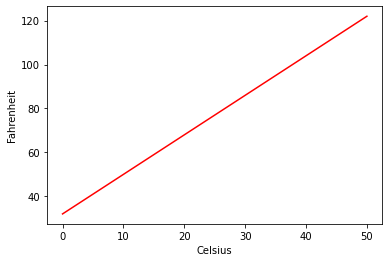

In [3]:
# 100 linearly spaced numbers
x = np.linspace(0,50,10)

# the function, which is y = x^2 here
y = (9/5) * x + 32

# setting the axes at the centre
fig = plt.figure()

# plot the function
plt.plot(x,y, 'r')
plt.xlabel("Celsius")
plt.ylabel("Fahrenheit")

# show the plot
plt.show()

As you may remember, the relationship between degrees Fahrenheit and degrees Celsius is known to be:

$$Fahr = \dfrac{9}{5}Cels+32$$

That is, if you know the temperature in degrees Celsius, you can use this equation to determine the temperature in degrees Fahrenheit exactly.

### 2. Statistical Relationships

For each of these deterministic relationships, the equation exactly describes the relationship between the two variables. This course does not examine deterministic relationships. Instead, we are interested in **statistical relationships**, in which the relationship between the variables is not perfect.

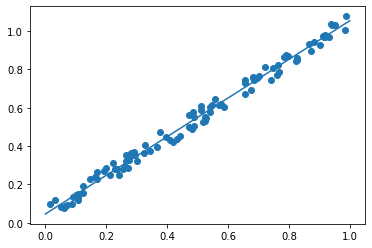

In [8]:
import statsmodels.api as sm

X = np.random.rand(100)
Y = X + np.random.rand(100)*0.1

results = sm.OLS(Y,sm.add_constant(X)).fit()

#print(results.summary())

plt.scatter(X,Y)

X_plot = np.linspace(0,1,100)
plt.plot(X_plot, X_plot * results.params[1] + results.params[0])

plt.show()

Indeed, the plot exhibits some "trend," but it also exhibits some "scatter." Therefore, it is a statistical relationship, not a deterministic one.

# 1.2  What is the "Best Fitting Line"?

Looking at the plot below, which line — the solid line or the dashed line — do you think best summarizes the trend between height and weight?

![](https://online.stat.psu.edu/onlinecourses/sites/stat501/files/01simple/heightweight.jpeg)

In order to examine which of the two lines is a better fit, we first need to introduce some common notation:
- $y_{i}$ denotes the observed response for experimental unit $i$
- $x_{i}$ denotes the predictor value for experimental unit $i$
- $\hat{y}_{i}$ is the predicted response (or fitted value) for experimental unit $i$

Then, the equation for the best fitting line is:

$$
\hat{y}_{i}=b_{0}+b_{1} x_{i}
$$

Incidentally, recall that an "experimental unit" is the object or person on which the measurement is made. In our height and weight example, the experimental units are students.

Let's try out the notation on our example with the trend summarized by the line

$$
w=-266.53+6.1376 h
$$

The first data point in the list indicates that student 1 is 63 inches tall and weighs 127 pounds. That is, $x_{1}=63$ and $y_{1}=127$. Do you see this point on the plot? If we know this student's height but not his or her weight, we could use the equation of the line to predict his or her weight. We'd predict the student's weight to be $-266.53+6.1376(63)$ or $120.1$ pounds. That is, $\hat{y}_{1}=120.1$. Clearly, our prediction wouldn't be perfectly correct - it has some "prediction error" (or "residual error"). In fact, the size of its prediction error is $127-120.1$ or $6.9$ pounds.

You might want to roll your cursor over each of the 10 data points to make sure you understand the notation used to keep track of the predictor values, the observed responses and the predicted responses:

![](https://s2.loli.net/2022/02/23/ijbz8YBcntNpqG9.png)

As you can see, the size of the prediction error depends on the data point. If we didn't know the weight of student 5, the equation of the line would predict his or her weight to be $-266.53+$ $6.1376(69)$ or 157 pounds. The size of the prediction error here is $162-157$, or 5 pounds.

In general, when we use $\hat{y}_{i}=b_{0}+b_{1} x_{i}$ to predict the actual response $y_{i}$, we make a prediction error (or residual error) of size:

$$
e_{i}=y_{i}-\hat{y}_{i}
$$

A line that fits the data "best" will be one for which the $n$ prediction errors - one for each observed data point - are as small as possible in some overall sense. One way to achieve this goal is to invoke the "least squares criterion," which says to "minimize the sum of the squared prediction errors." That is:
- The equation of the best fitting line is: $\hat{y}_{i}=b_{0}+b_{1} x_{i}$
- We just need to find the values $b_{0}$ and $b_{1}$ that make the sum of the squared prediction errors the smallest it can be.
- That is, we need to find the values $b_{0}$ and $b_{1}$ that minimize:

$$
Q=\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}
$$

Here's how you might think about this quantity $Q$ :
- The quantity $e_{i}=y_{i}-\hat{y}_{i}$ is the prediction error for data point $i$.
- The quantity $e_{i}^{2}=\left(y_{i}-\hat{y}_{i}\right)^{2}$ is the squared prediction error for data point $i$.
- And, the symbol $\sum_{i=1}^{n}$ tells us to add up the squared prediction errors for all $n$ data points.

Incidentally, if we didn't square the prediction error $e_{i}=y_{i}-\hat{y}_{i}$ to get $e_{i}^{2}=\left(y_{i}-\hat{y}_{i}\right)^{2}$, the positive and negative prediction errors would cancel each other out when summed, always yielding 0 .

Now, being familiar with the least squares criterion, let's take a fresh look at our plot again. In light of the least squares criterion, which line do you now think is the best fitting line?

The following two side-by-side tables illustrate the implementation of the least squares criterion for the two lines up for consideration — the dashed line and the solid line.

![](https://s2.loli.net/2022/02/23/MWD34iJnuGpltwE.png)

$$
\text { Therefore, of the two lines, the solid line, } w=-266.53+6.1376 h, \text { best summarizes the data. }
$$

The formulas are determined using methods of calculus. We minimize the equation for the sum of the squared prediction errors:

$$
Q=\sum_{i=1}^{n}\left(y_{i}-\left(b_{0}+b_{1} x_{i}\right)\right)^{2}
$$

(that is, take the derivative with respect to $b_{0}$ and $b_{1}$, set to 0 , and solve for $b_{0}$ and $b_{1}$ ) and get the "least squares estimates" for $b_{0}$ and $b_{1}$ :

$$
b_{0}=\bar{y}-b_{1} \bar{x}
$$

and:

$$
b_{1}=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}}
$$

# 1.3 The Simple Linear Regression Model

We have worked hard to come up with formulas for the intercept $b_{0}$ and the slope $b_{1}$ of the least squares regression line. But, we haven't yet discussed what $b_{0}$ and $b_{1}$ estimate.

![](https://s2.loli.net/2022/02/23/G1EOLqn4ZazMR26.png)

The sample intercept $b_{0}$ estimates the population intercept $\beta_{0}$ and the sample slope $b_{1}$ estimates the population slope $\beta_{1}$.

We are now ready to summarize the four conditions that comprise "the simple linear regression model:"
- Linear Function: The mean of the response, $\mathrm{E}\left(Y_{i}\right)$, at each value of the predictor, $x_{i}$, is a Linear function of the $x_{i}$.
- Independent: The errors, $\epsilon_{i}$, are Independent.
- Normally Distributed: The errors, $\epsilon_{i}$, at each value of the predictor, $x_{i}$, are Normally distributed.
- Equal variances (denoted $\sigma^{2}$ ): The errors, $\epsilon_{i}$, at each value of the predictor, $x_{i}$, have Equal variances (denoted $\sigma^{2}$ ).

# 1.4 Common Error Variance

That is, $σ^2$ quantifies how much the responses (y) vary around the (unknown) mean population regression line $\mu_Y = E(Y) = \beta_0 + \beta_1 x$.

Why should we care about $\sigma^2$? The answer to this question pertains to the most common use of an estimated regression line, namely predicting some future response.

In [ ]:
### Sample Variance

In [10]:
### Mean square error

# 1.5 The coefficient of Determination, $r^2$

## Characteristics of $r^2$

- Since $r^2$ is a proportion, it is always a number between 0 and 1.
- If $r^2 = 1$, all of the data points fall perfectly on the regression line. The predictor $x$ accounts for all of the variation in $y$!
- If $r^2 = 0$, the estimated regression line is perfectly horiziontal. The predictor $x$ accounts for none of the variation in $y$!